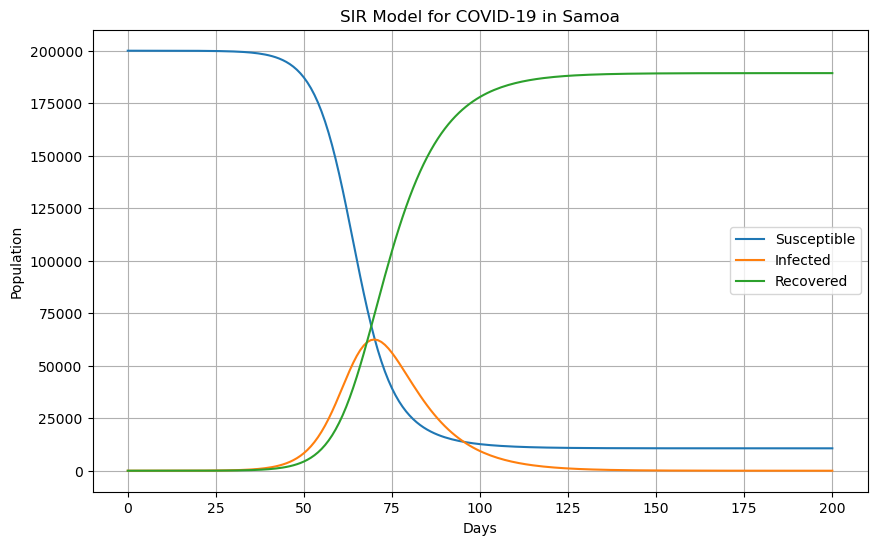

In [1]:
## ignore this 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
population = 200000  # Total population of Samoa
initial_infections = 1  # Initial number of infections
days = 200  # Number of days to simulate

# Initial conditions
susceptible = population - initial_infections
infected = initial_infections
recovered = 0

# Lists to store the results
susceptible_list = [susceptible]
infected_list = [infected]
recovered_list = [recovered]

# Simulation
for day in range(days):
    new_infections = beta * susceptible * infected / population
    new_recoveries = gamma * infected
    susceptible -= new_infections
    infected += new_infections - new_recoveries
    recovered += new_recoveries
    
    susceptible_list.append(susceptible)
    infected_list.append(infected)
    recovered_list.append(recovered)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_list, label='Susceptible')
plt.plot(infected_list, label='Infected')
plt.plot(recovered_list, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model for COVID-19 in Samoa')
plt.legend()
plt.grid(True)
plt.show()

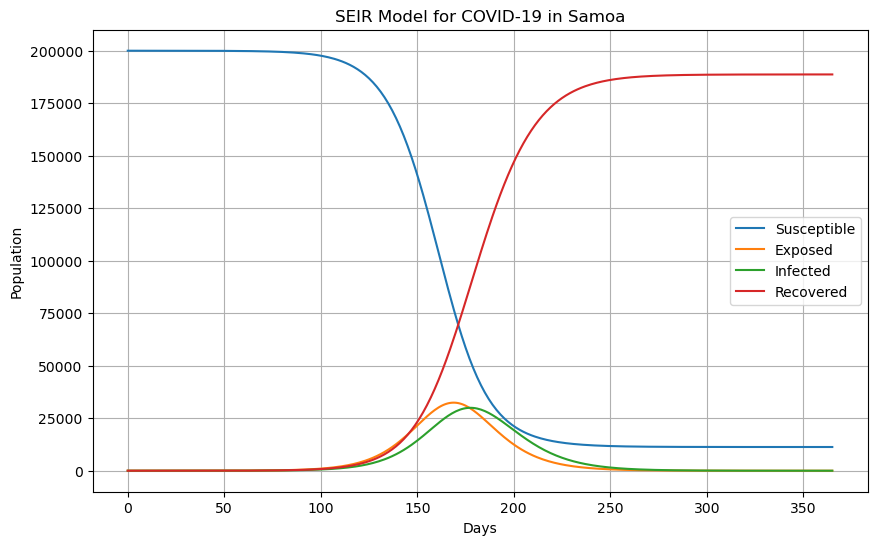

In [5]:
## ignore this
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.3  # Infection rate
sigma = 0.1  # Incubation rate
gamma = 0.1  # Recovery rate
population = 200000  # Total population of Samoa
initial_infections = 1  # Initial number of infections
initial_exposed = 0  # Initial number of exposed individuals
days = 365  # Number of days to simulate

# Initial conditions
susceptible = population - initial_infections - initial_exposed
exposed = initial_exposed
infected = initial_infections
recovered = 0

# Lists to store the results
susceptible_list = [susceptible]
exposed_list = [exposed]
infected_list = [infected]
recovered_list = [recovered]

# Simulation
for day in range(days):
    new_exposures = beta * susceptible * infected / population
    new_infections = sigma * exposed
    new_recoveries = gamma * infected
    susceptible -= new_exposures
    exposed += new_exposures - new_infections
    infected += new_infections - new_recoveries
    recovered += new_recoveries

    susceptible_list.append(susceptible)
    exposed_list.append(exposed)
    infected_list.append(infected)
    recovered_list.append(recovered)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_list, label='Susceptible')
plt.plot(exposed_list, label='Exposed')
plt.plot(infected_list, label='Infected')
plt.plot(recovered_list, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Model for COVID-19 in Samoa')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np

# Define parameters for the SEIR model
n = 2  # Number of islands
initial_population = np.array([1000, 800])
timesteps = 365  # Number of time steps
beta = 0.3  # Transmission rate
sigma = 0.1  # Incubation rate
gamma = 0.05  # Recovery rate

# Initialize arrays to store SEIR scenarios and population
seir_matrix = np.zeros((4, n, timesteps))
population_matrix = np.zeros((1, n))

# Initialize initial conditions for each island
initial_infected = np.array([5, 3])  # Initial infected individuals on each island

# Initialize the population matrix
population_matrix[0] = initial_population

# Initialize the initial infected individuals for each island
seir_matrix[2, :, 0] = initial_infected

# Simulate the SEIR model
for t in range(1, timesteps):
    for island in range(n):
        S, E, I, R = seir_matrix[:, island, t - 1]
        
        # SEIR equations
        dS = -beta * S * I / initial_population[island]
        dE = beta * S * I / initial_population[island] - sigma * E
        dI = sigma * E - gamma * I
        dR = gamma * I

        # Update the SEIR compartments
        S += dS
        E += dE
        I += dI
        R += dR

        # Ensure non-negative values
        S = max(S, 0)
        E = max(E, 0)
        I = max(I, 0)
        R = max(R, 0)

        # Update the SEIR matrix
        seir_matrix[:, island, t] = [S, E, I, R]


# Print the results
# for island in range(n):
#     print(f"Island {island + 1} - Final values: S={seir_matrix[0, island, -1]}, E={seir_matrix[1, island, -1]}, I={seir_matrix[2, island, -1]}, R={seir_matrix[3, island, -1]}")


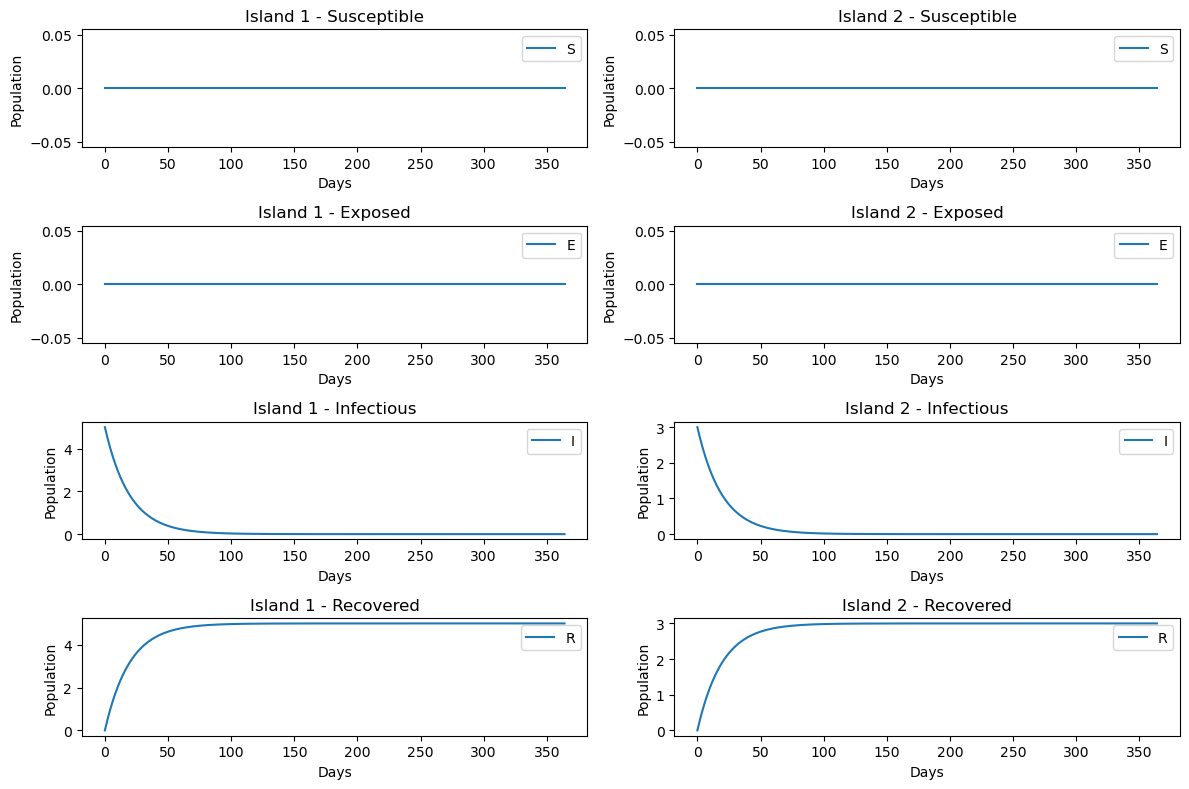

In [17]:


# Plot the SEIR compartments for each island
plt.figure(figsize=(12, 8))

rows = 4  # Number of rows
cols = n  # Number of columns (should be equal to the number of islands)
days = range(timesteps)

for island in range(n):
    plt.subplot(4, n, island + 1)
    plt.plot(days, seir_matrix[0, island, :], label="S")
    plt.title(f'Island {island + 1} - Susceptible')
    
    plt.subplot(4, n, n + island + 1)
    plt.plot(days, seir_matrix[1, island, :], label="E")
    plt.title(f'Island {island + 1} - Exposed')
    
    plt.subplot(4, n, 2 * n + island + 1)
    plt.plot(days, seir_matrix[2, island, :], label="I")
    plt.title(f'Island {island + 1} - Infectious')
    
    plt.subplot(4, n, 3 * n + island + 1)
    plt.plot(days, seir_matrix[3, island, :], label="R")
    plt.title(f'Island {island + 1} - Recovered')

# Add legends and labels
for i in range(4 * n):
    plt.subplot(4, n, i + 1)
    plt.legend(loc="upper right")
    plt.xlabel("Days")
    plt.ylabel("Population")

plt.tight_layout()
plt.show()

